In [139]:
import numpy as np

def readMatrix(file):
    fd = open(file, 'r')
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        v = kv[1::2]
        matrix[i, k] = v
    return matrix, tokens, np.array(Y)

def nb_train(matrix, category):
    state = {}
    N = matrix.shape[1]
    ###################
    vn0 = np.sum(matrix[category == 0, :])
    vn1 = np.sum(matrix[category == 1, :])
    
    state['phi0'] =  (np.sum(matrix[category == 0, :], axis = 0) + 1)/ (vn0 + N)
    state['phi1'] =  (np.sum(matrix[category == 1, :], axis = 0) + 1)/ (vn1 + N)
    
    state['y1']  = np.sum(category) / category.shape[0]
    ###################
    return state

def nb_test(matrix, state):
    output = np.zeros(matrix.shape[0])
    ###################
    py1 = matrix.dot(np.log(state['phi1'])) + np.log(state['y1'])
    py0 = matrix.dot(np.log(state['phi0'])) + np.log(1 - state['y1'])

    output[py1 > py0] = 1
    ###################
    return output

def evaluate(output, label):
    error = (output != label).sum() * 1. / len(output)
    print ('Error: %1.4f' % error)
    return error

def main():
    trainMatrix, tokenlist, trainCategory = readMatrix('dataset/MATRIX.TRAIN')
    testMatrix, tokenlist, testCategory = readMatrix('dataset/MATRIX.TEST')

    state = nb_train(trainMatrix, trainCategory)
    output = nb_test(testMatrix, state)

    evaluate(output, testCategory)

In [140]:
def findMostIndictive(dataset, n = 5):
    trainMatrix, tokenlist, trainCategory = readMatrix(dataset)
    state = nb_train(trainMatrix, trainCategory)
    ratio = state['phi1'] / state['phi0']
    indices = np.argsort(ratio)[::-1]
    print(np.asarray(tokenlist)[indices[:n]])

In [109]:
findMostIndictive('dataset/MATRIX.TRAIN', 50)

['httpaddr' 'spam' 'unsubscrib' 'ebai' 'valet' 'diploma' 'dvd' 'websit'
 'click' 'lowest' 'numberpx' 'arial' 'helvetica' 'serif' 'nashua'
 'amherst' 'mortgag' 'refin' 'charset' 'newslett' 'customerservic'
 'numberpt' 'iso' 'web' 'lender' 'numberd' 'loan' 'dailybargainmail'
 'coral' 'html' 'unsolicit' 'www' 'fl' 'holidai' 'equiti' 'tal' 'consolid'
 'bachelor' 'sweepstak' 'subscript' 'mba' 'bonu' 'ae' 'refinanc' 'hover'
 'mime' 'untitl' 'subscrib' 'recur' 'postal']


In [142]:
import glob
from matplotlib import pyplot as plt

Error: 0.0387
Error: 0.0262
Error: 0.0262
Error: 0.0187
Error: 0.0175
Error: 0.0163


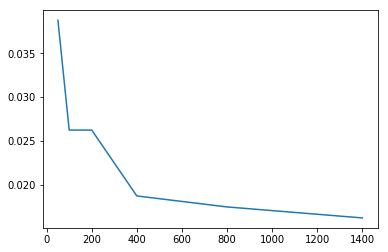

In [143]:
def tryMultipleSize():
    prefix = "dataset/MATRIX.TRAIN."
    lst = sorted([int(s.split('.')[-1]) for s in glob.glob(prefix + "*")])
    
    testMatrix, tokenlist, testCategory = readMatrix('dataset/MATRIX.TEST')
    errors = []
    for l in lst:
        trainMatrix, tokenlist, trainCategory = readMatrix('{0}{1}'.format(prefix, l))
        state = nb_train(trainMatrix, trainCategory)
        output = nb_test(testMatrix, state)
        errors.append(evaluate(output, testCategory))
    
    plt.plot(lst, errors)
tryMultipleSize()

In [144]:
a = np.array([[1, 2],[3, 4]])
a * a

array([[ 1,  4],
       [ 9, 16]])